Выборка Heart Disease. Содержит медицинские данные пациентов, такие как возраст, пол, уровень холестерина, 
и наличие заболевания сердца.

1. Загрузите данные и выведите информацию о них. Проверьте на наличие пропусков.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 

print(heart_disease.metadata.data_url)
  
# variable information 
print(heart_disease.variables) 


https://archive.ics.uci.edu/static/public/45/data.csv
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                      

In [2]:
import requests
import os

# Получаем ссылку на файл
url = heart_disease.metadata.data_url

# Создаем папку Dataset, если такой нет
os.makedirs('Datasets', exist_ok=True)

# Определяем имя файла из URL (например, последний фрагмент пути)
filename = url.split('/')[-1]

# Путь для сохранения файла
filepath = os.path.join('Datasets', filename)

# Скачиваем и сохраняем файл
response = requests.get(url)
with open(filepath, 'wb') as f:
    f.write(response.content)

print(f'Файл сохранен по пути: {filepath}')


Файл сохранен по пути: Datasets\data.csv


In [3]:
import pandas as pd
data=pd.read_csv("Datasets/data.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


In [4]:
#посмотрим количество пропусков по каждому столбцу
print(data.isnull().sum())

# убираем данные с пропусками
data.dropna(inplace=True)


print(f'Текущий размеры массива данных: [{data.shape[0]} рядов x {data.shape[1]} столбцов]')


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Текущий размеры массива данных: [297 рядов x 14 столбцов]


2. Постройте столбчатую диаграмму, сравнивающую количество здоровых и больных пациентов.

In [5]:
import numpy as np

diagnosis = data['num'].values
diagnosis = np.where(diagnosis > 1, 1, diagnosis)
counts = np.bincount(diagnosis)
print(counts)


[160 137]


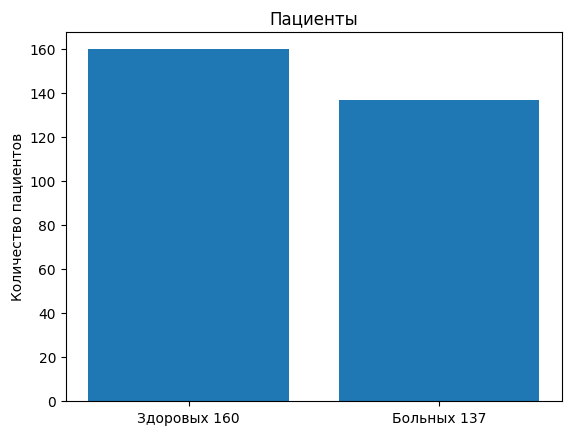

In [6]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.bar([f'Здоровых {counts[0]}', f'Больных {counts[1]}'], counts)
ax.set_ylabel('Количество пациентов')
ax.set_title('Пациенты')
plt.show()

3. Создайте диаграмму рассеяния, показывающую зависимость максимального пульса (thalach) от возраста (age). Раскрасьте точки в зависимости от наличия болезни.

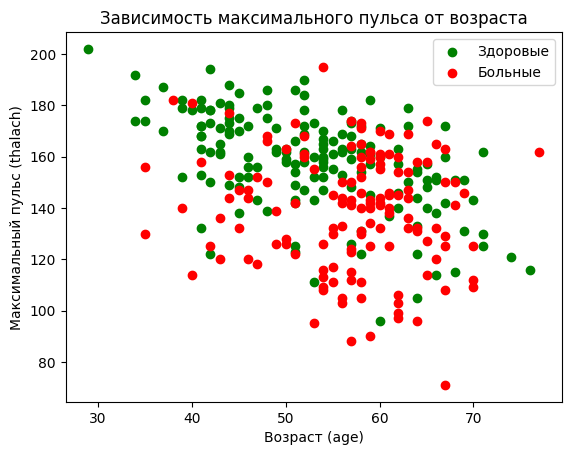

In [7]:

# Фильтрация данных по признаку target в самом датафрейме data
healthy = data[data['num'] == 0]
diseased = data[data['num'] >= 1]

plt.scatter(healthy['age'], healthy['thalach'], color='green', label='Здоровые')
plt.scatter(diseased['age'], diseased['thalach'], color='red', label='Больные')

plt.xlabel('Возраст (age)')
plt.ylabel('Максимальный пульс (thalach)')
plt.title('Зависимость максимального пульса от возраста')
plt.legend()
plt.show()


4. Преобразуйте признак sex (0 = женщина, 1 = мужчина) в более читаемый формат с категориями 'female' и 'male', а затем примените к нему One-Hot Encoding.

In [8]:
# Преобразуем числовой признак sex в категориальный
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})

In [9]:
# Проверим результат
print(data)

     age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    male   1       145   233    1        2      150      0      2.3   
1     67    male   4       160   286    0        2      108      1      1.5   
2     67    male   4       120   229    0        2      129      1      2.6   
3     37    male   3       130   250    0        0      187      0      3.5   
4     41  female   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57  female   4       140   241    0        0      123      1      0.2   
298   45    male   1       110   264    0        0      132      0      1.2   
299   68    male   4       144   193    1        0      141      0      3.4   
300   57    male   4       130   131    0        0      115      1      1.2   
301   57  female   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0 

In [10]:
# Применяем One-Hot Encoding к колонке sex
data = pd.get_dummies(data, dtype="int")

In [11]:
# Проверим результат
print(data)

     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     63   1       145   233    1        2      150      0      2.3      3   
1     67   4       160   286    0        2      108      1      1.5      2   
2     67   4       120   229    0        2      129      1      2.6      2   
3     37   3       130   250    0        0      187      0      3.5      3   
4     41   2       130   204    0        2      172      0      1.4      1   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
297   57   4       140   241    0        0      123      1      0.2      2   
298   45   1       110   264    0        0      132      0      1.2      2   
299   68   4       144   193    1        0      141      0      3.4      2   
300   57   4       130   131    0        0      115      1      1.2      2   
301   57   2       130   236    0        2      174      0      0.0      2   

      ca  thal  num  sex_female  sex_male  
0    0.0   6.0    0

5. Рассчитайте средний уровень холестерина (chol) для больных и здоровых пациентов.

In [12]:
mean_chol = data.groupby(data['num'] >= 1)['chol'].mean()
mean_chol.index = ['Здоровые', 'Больные']
print(mean_chol)


Здоровые    243.493750
Больные     251.854015
Name: chol, dtype: float64


6. Выполните нормализацию признаков age, trestbps, chol и thalach.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [15]:
print(data.describe())

              age          cp    trestbps        chol         fbs     restecg  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.532127    3.158249    0.355600    0.277055    0.144781    0.996633   
std      0.188536    0.964859    0.167574    0.118716    0.352474    0.994914   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.395833    3.000000    0.245283    0.194064    0.000000    0.000000   
50%      0.562500    3.000000    0.339623    0.267123    0.000000    1.000000   
75%      0.666667    4.000000    0.433962    0.342466    0.000000    2.000000   
max      1.000000    4.000000    1.000000    1.000000    1.000000    2.000000   

          thalach       exang     oldpeak       slope          ca        thal  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.599995    0.326599    1.055556    1.602694    0.676768    4.730640   
std      0.175126    0.4697